# NumPy Basics: Arrays and Vectorized Computation

Python objects:	
high-level number objects: integers, floating point
containers: lists (costless insertion and append), dictionaries (fast lookup)
NumPy provides:	
extension package to Python for multi-dimensional arrays
closer to hardware (efficiency)
designed for scientific computation (convenience)
Also known as array oriented computing

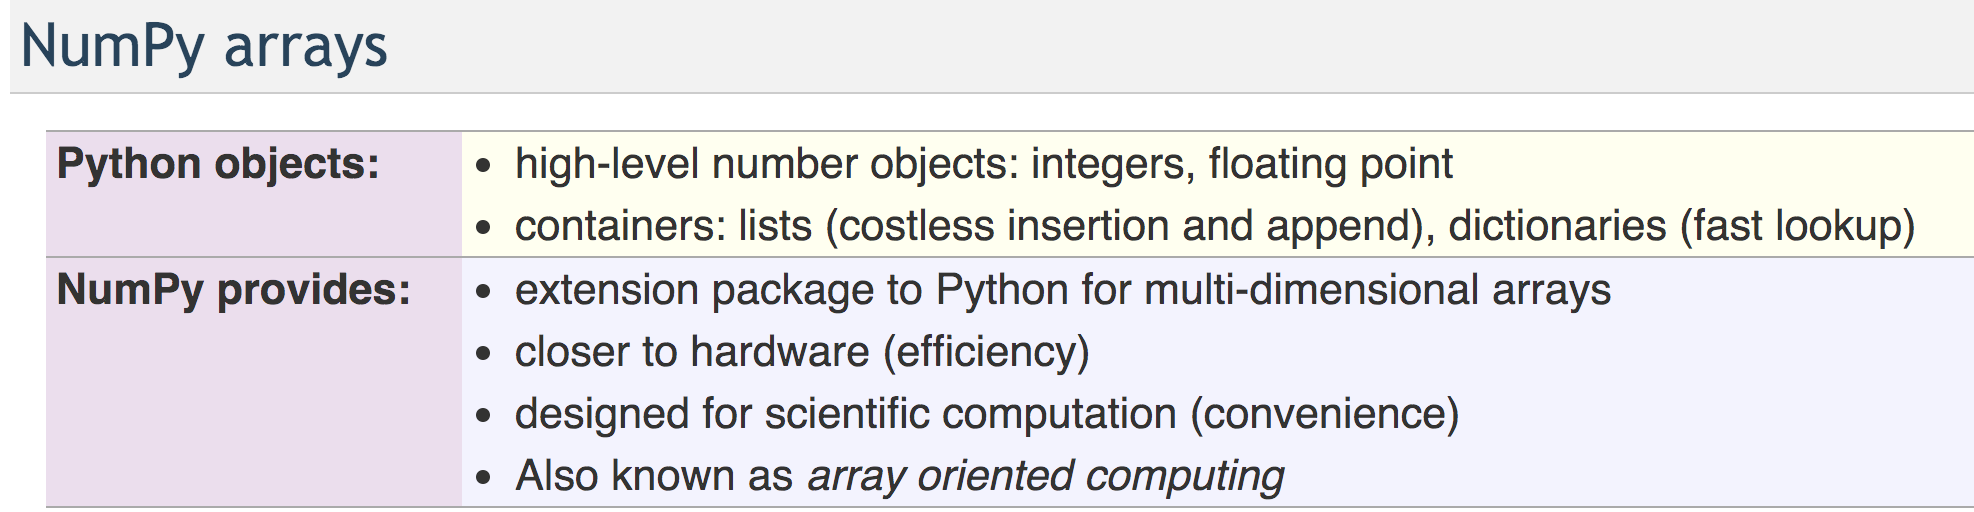

### References
On the web: 

* http://docs.scipy.org/
* https://en.wikipedia.org/wiki/NumPy


Interactive help:

```python
np.array?
```

In [1]:
np.array?

Object `np.array` not found.


The recommended convention to import numpy is:

```python
import numpy as np
```

In [2]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [3]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 20 ms
Wall time: 703 ms


## The NumPy ndarray: A Multidimensional Array Object
One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to
perform mathematical operations on whole blocks of data using similar syntax to the
equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax
to scalar values on built-in Python objects, I first import NumPy and generate a small
array of random data:

In [5]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [6]:
data * 10
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [7]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays
The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data. For example, a list is a good candidate for conversion:

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array:

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape
inferred fr

In [10]:
arr2.ndim
arr2.shape

(2, 4)

In [11]:
arr1.dtype
arr2.dtype

dtype('int32')

In [12]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [13]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays
Unless explicitly specified (more on this later), np.array tries to infer a good data
type for the array that it creates. The data type is stored in a special dtype metadata
object; for example, in the previous two examples we have:

In [14]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [15]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [16]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

It’s not safe to assume that np.empty will return an array of all
zeros. In some cases, it may return uninitialized “garbage” values.

In [18]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [19]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

#### arange
arange is an array-valued version of the built-in Python range function:

In [20]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [21]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

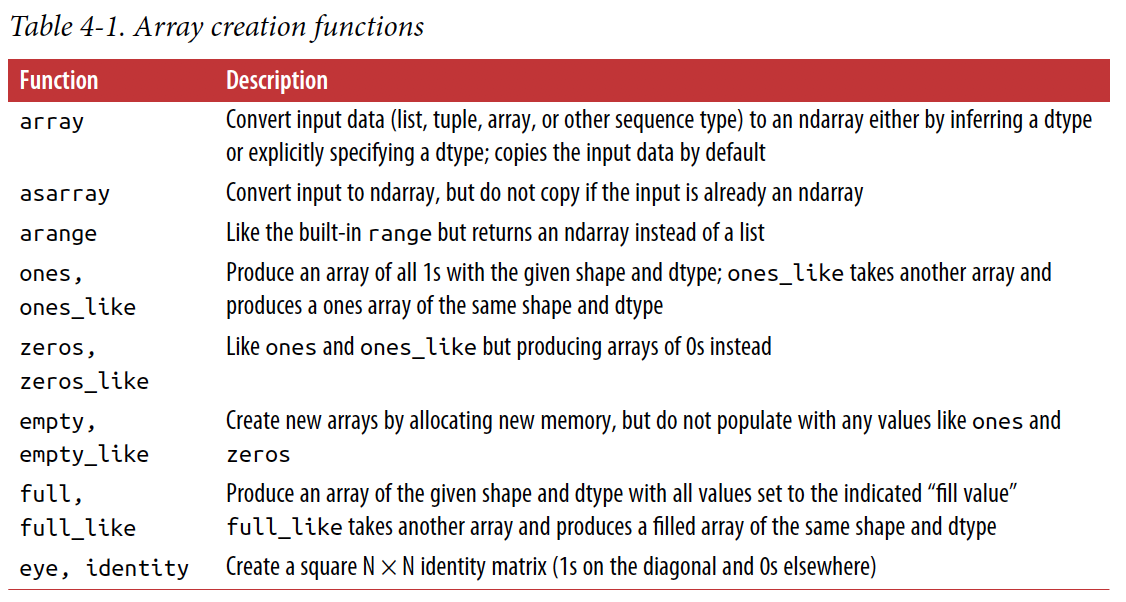

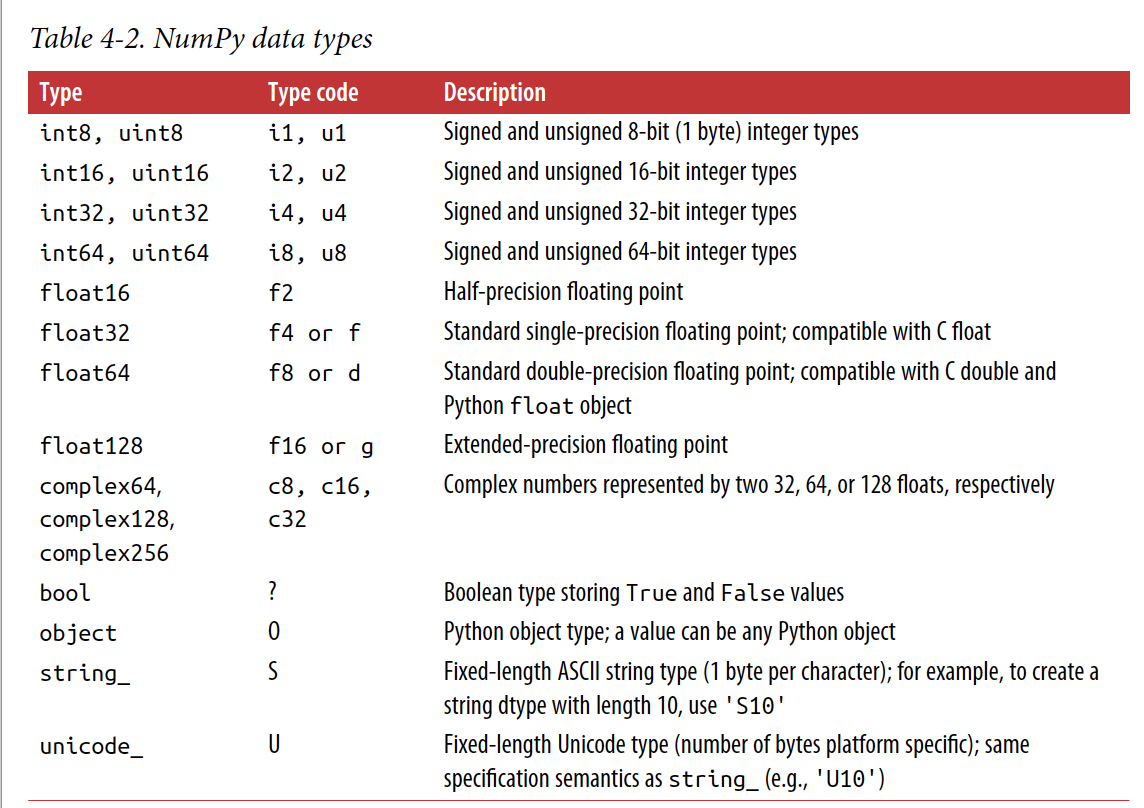

### Arithmetic with NumPy Arrays

In [22]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
1 / arr
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [24]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

For more background see [here](https://scipy-lectures.org/intro/numpy/array_object.html).

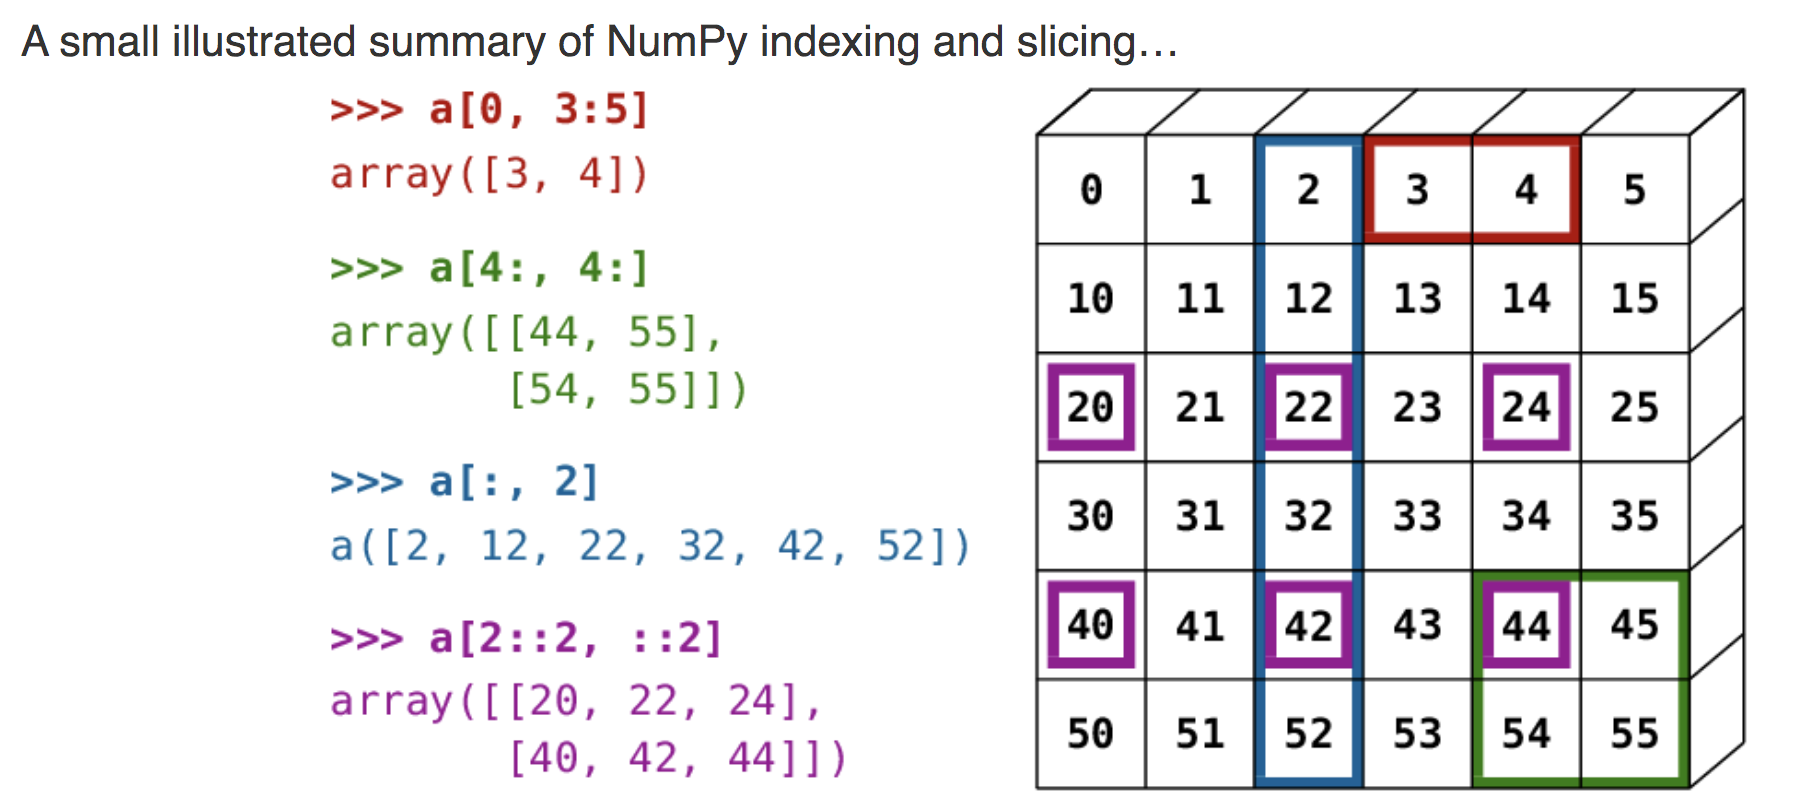

In [25]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [26]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [27]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [28]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [29]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [30]:
arr2d[0][2]
arr2d[0, 2]

3

In [31]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [32]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [34]:
arr3d[1, 0]

array([7, 8, 9])

In [35]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

#### Indexing with slices

In [36]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [37]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [39]:
arr2d[1, :2]

array([4, 5])

In [40]:
arr2d[:2, 2]

array([3, 6])

In [41]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [42]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [43]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [44]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [45]:
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

In [46]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

In [47]:
names != 'Bob'
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [48]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [49]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

In [50]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [51]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy Indexing

In [52]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [53]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [54]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [55]:
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [56]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes

In [57]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [58]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

In [59]:
arr = np.arange(16).reshape((2, 2, 4)) # !!!
arr
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [60]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple element-wise transformations, like `sqrt` or `exp`:

In [61]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

### unary ufuncs versus binary ufuncs
These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays
(thus, binary ufuncs) and return a single array as the result:

In [62]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

Here, `numpy.maximum` computed the ***element-wise maximum*** of the elements in x and
y.

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized
version of the built-in Python `divmod`; it returns the fractional and integral
parts of a floating-point array:

In [63]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

array([-3., -6., -6.,  5.,  3.,  3.,  5.])

### operate in-place on arrays
Ufuncs accept an optional out argument that allows them to operate in-place on
arrays:

In [64]:
arr = np.random.randn(7) * 10
print(f"arr before:{arr}")
np.sqrt(arr)
print(f"arr after :{arr}") # Sqrt equation is not working bc of negative values
np.abs(arr, arr)
arr
print(f"arr after in-place :{arr}")


arr before:[ -5.0309  -6.2227  -9.2117  -7.2621   2.229    0.5132 -11.5772]
arr after :[ -5.0309  -6.2227  -9.2117  -7.2621   2.229    0.5132 -11.5772]
arr after in-place :[ 5.0309  6.2227  9.2117  7.2621  2.229   0.5132 11.5772]


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


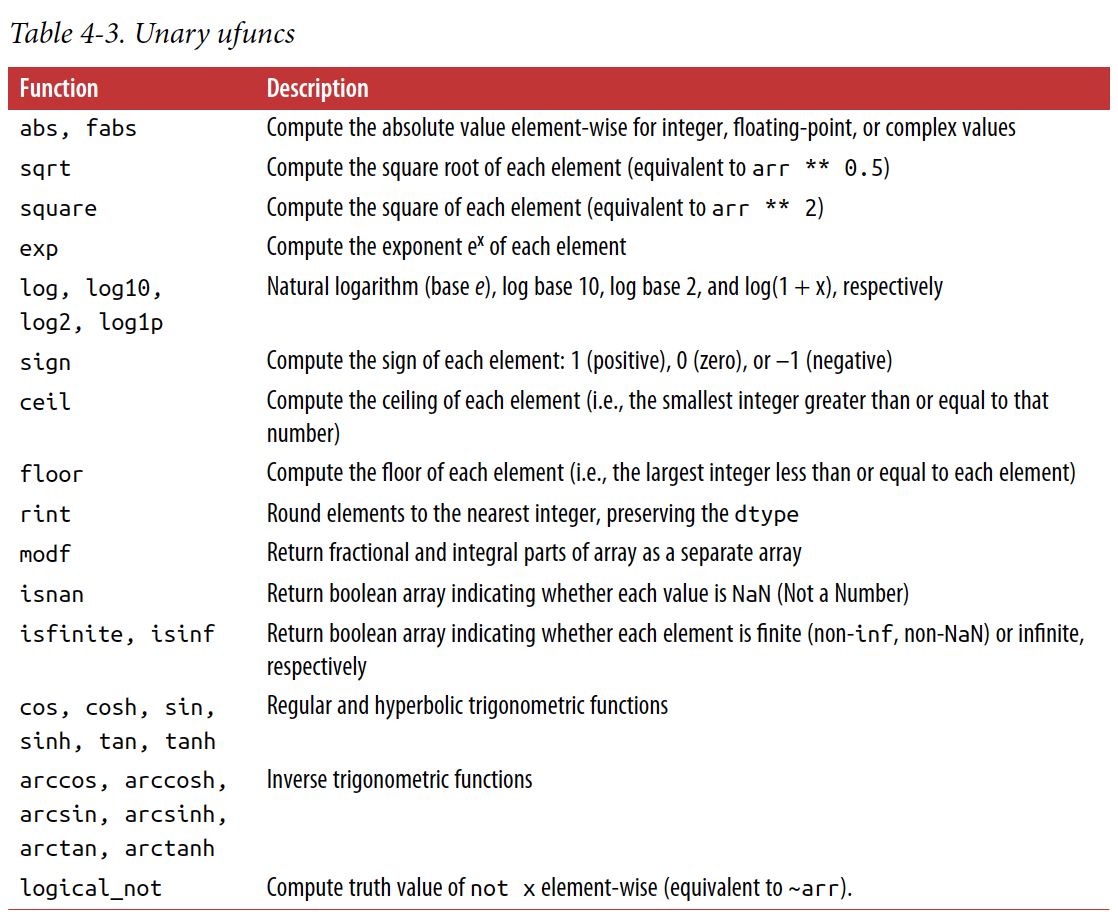

## Vectorization: Array-Oriented Programming with Arrays
###  Vectorization: replacing explicit loops with array expressions is commonly referred to as vectorization
Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization.
In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations. Later, in Appendix A, I explain broadcasting, a
powerful method for vectorizing computations.

### np.meshgrid(points, points) #cartesian product
As a simple example, suppose we wished to evaluate the function $\sqrt{(x^2 + y^2)}$
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of $(x, y)$ in the two arrays:

In [65]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)  #create two matrices
print(f"xs.shape: {xs.shape}")
print(f"ys.shape: {ys.shape}")
ys

xs.shape: (1000, 1000)
ys.shape: (1000, 1000)


array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

### np.sqrt: element wise operation (e.g., on xs and ys)
Now, evaluating the function is a matter of writing the same expression you would
write with two points:

In [66]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

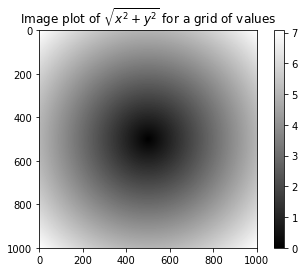

In [67]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values") # use $ to import math function

In [68]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [69]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression 
```python
x if condition else y
```
Suppose we had a boolean array and two arrays of values:

In [70]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [71]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

### vectorized `np.where` op versus a for loop 

```python
result = np.where(cond, xarr, yarr)
```

Here cond is a matrix (or vector) that dictates the shape of the result.

In [72]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

### second and third arguments to np.where can be scalars

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array. Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:

In [73]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [-2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2, -2]])

You can combine scalars and arrays when using np.where. For example, I can replace
all positive values in arr with the constant `2` like so:

In [74]:
np.where(arr > 0,   2,    arr) # set only positive values to 2

array([[ 2.    ,  2.    ,  2.    ,  2.    ],
       [-0.9975,  2.    , -0.1316,  2.    ],
       [ 2.    ,  2.    , -0.1149,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.7485]])

### Mathematical and Statistical Methods

In [75]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

-1.9117900069248925

In [76]:
arr.mean(axis=1)
arr.sum(axis=0)

array([ 0.0965,  0.2588, -1.4873, -0.7798])

In [77]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [78]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays

In [79]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

43

In [80]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### Sorting

In [81]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-1.8245, -0.9616, -0.4457, -0.2555,  0.4684,  1.2636])

In [82]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[ 0.6254,  1.0229,  1.1074],
       [-0.3501,  0.0909,  0.218 ],
       [-1.7415, -1.0523, -0.8948],
       [-2.4203, -0.5762,  1.4366],
       [-1.0623,  0.001 ,  0.2374]])

In [83]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5308984278773312

### Unique and Other Set Logic

In [84]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [85]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [86]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

In [87]:
arr = np.arange(10)
np.save('some_array', arr)

In [88]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
np.savez('array_archive.npz', a=arr, b=arr)

In [90]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [92]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


## Linear Algebra

In [93]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [94]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [95]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [96]:
x @ np.ones(3)

array([ 6., 15.])

In [97]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-0.9722, -0.8684, -0.7662, -0.1833,  0.4097],
       [ 0.    , -6.2417, -3.5852,  0.4809, -4.253 ],
       [ 0.    ,  0.    , -0.8245,  1.8971, -3.9035],
       [ 0.    ,  0.    ,  0.    , -0.9413,  1.4632],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.1324]])

## Pseudorandom Number Generation

In [98]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.237 , -0.5367,  1.8545, -0.92  ],
       [-0.1082,  0.1525,  0.9435, -1.0953],
       [-0.144 ,  1.9562, -0.2912,  0.1048],
       [ 0.1396, -0.2841, -0.7082,  2.4632]])

In [99]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

681 ms ± 8.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.7 ms ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
np.random.seed(1234)

In [101]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## Example: Random Walks

In [102]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [103]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

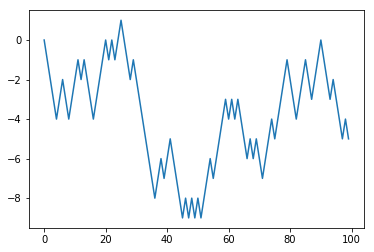

In [104]:
plt.plot(walk[:100])

In [105]:
np.random.seed(12345)

In [106]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [107]:
walk.min()
walk.max()

31

In [108]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

In [109]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [110]:
walks.max()
walks.min()

-133

In [111]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [112]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [113]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion